# FUNCIONES
En las proximas celdas definimos las funciones a utilizar.
Resumen:
1. read_csv(file_path): lee los dataset de archivos .csv
2. transform(dt): transforma los atributos y etiquetas a tipo númerico para usar AA
3. Funcion para graficar la curva de precisión en evaluacion



In [3]:
# Esta celda contiene una funcion para poder leer los dataset
# que se encuentran dentro de archivos CSV. La funcion devolvera
# un objeto con las mismas caracteriticas que los que devuelven
# las funciones de la libreria SciKit-Learn.
#
# Ej: train_dataset = read_csv("fashion-mnist_train.csv")
#
import pandas as pd
from sklearn.utils import Bunch

def read_csv(file_path):

  csv_data = pd.read_csv(file_path)

  output_dataset = Bunch(data = csv_data.iloc[:, :-2].values,
                         target = csv_data.iloc[:, -2].values,
                         feature_names = csv_data.columns[:-2].values,
                         target_names = csv_data.dropna().iloc[:, -1].values)

  return output_dataset

In [4]:
# Esta celda contiene una funcion para poder transformar los atributos
# y las etiquetas del dataset a tipo de datos numericos. De esta forma,
# el dataset se puede utilizar para entrenar un modelo de AA.
#
# Ej: transformed_dataset = transform(dataset)
#
from sklearn.preprocessing import OrdinalEncoder, LabelEncoder

def transform(dt):

    # Transformar los atributos no numéricos utilizando el OrdinalEncoder
    encoder = OrdinalEncoder()
    dt.data = encoder.fit_transform(dt.data)

    # Transformar las clases no numéricas utilizando el LabelEncoder
    encoder = LabelEncoder()
    dt.target = encoder.fit_transform(dt.target)

    return dt

In [5]:
# Funcion para graficar la curva de precisión en evaluacion

def Graficar_curva_precision(test_accuracy,min_samples_split_range,min_samples_leaf_range):
    # Crear una matriz de precisión en evaluación para la representación gráfica
    eval_accuracy_matrix = np.array(test_accuracy).reshape(len(min_samples_split_range), len(min_samples_leaf_range))

    # Encontrar las coordenadas (índices) del máximo valor de precisión en evaluación
    best_idx = np.unravel_index(np.argmax(eval_accuracy_matrix), eval_accuracy_matrix.shape)

    # Obtener los valores óptimos de min_samples_split y min_samples_leaf
    optimal_min_samples_split = min_samples_split_range[best_idx[0]]
    optimal_min_samples_leaf = min_samples_leaf_range[best_idx[1]]

    # Graficar la curva de precisión en evaluación
    plt.figure(figsize=(12, 8))
    plt.imshow(eval_accuracy_matrix, interpolation='nearest', cmap=plt.cm.Blues)
    plt.xlabel('min_samples_leaf')
    plt.ylabel('min_samples_split')
    plt.colorbar(label='Accuracy')
    plt.xticks(np.arange(len(min_samples_leaf_range)), min_samples_leaf_range, rotation=45)
    plt.yticks(np.arange(len(min_samples_split_range)), min_samples_split_range)
    plt.title('Accuracy en Evaluación para diferentes valores de min_samples_split y min_samples_leaf')
    plt.plot(best_idx[1], best_idx[0], 'ro')  # Resaltar el valor óptimo
    plt.show()

    # Imprimir los valores óptimos encontrados
    print("Valor óptimo de min_samples_split:", optimal_min_samples_split)
    print("Valor óptimo de min_samples_leaf:", optimal_min_samples_leaf)


# LECTURA DE DATOS

1. Leer los datos del archivo "credit.data.csv"
2. Transformar los datos con la funcion transform(dt)
3. Imprimir informacion para analizar el conjunto de datos

In [6]:
# Utilizamos las funciones para leer el archivo csv y transformar los datos
dataset = read_csv("./data/credit_data.csv")
dataset_transformed = transform(dataset)


In [8]:
df = pd.read_csv("./data/credit_data.csv")
df.describe()

,duration,credit_amount,installment_commitment,residence_since,age,existing_credits,num_dependents
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,20.903000,3271.258000,2.973000,2.845000,35.546000,1.407000,1.155000
std,12.058814,2822.736876,1.118715,1.103718,11.375469,0.577654,0.362086
min,4.000000,250.000000,1.000000,1.000000,19.000000,1.000000,1.000000
25%,12.000000,1365.500000,2.000000,2.000000,27.000000,1.000000,1.000000
50%,18.000000,2319.500000,3.000000,3.000000,33.000000,1.000000,1.000000
75%,24.000000,3972.250000,4.000000,4.000000,42.000000,2.000000,1.000000
max,72.000000,18424.000000,4.000000,4.000000,75.000000,4.000000,2.000000


In [9]:
# Imprimo informacion para analizar el conjunto de datos

print("Los atributos de entrada son: {}.".format(dataset_transformed.feature_names))
print("Las clases que intentaremos predecir son: {}.".format(dataset_transformed.target_names))
print("El formato de la matriz de datos es: {}.".format(dataset_transformed.data.shape))
print("El formato de la matriz de etiquetas es: {}.".format(dataset_transformed.target.shape))

Los atributos de entrada son: ['checking_status' 'duration' 'credit_history' 'purpose' 'credit_amount'
 'savings_status' 'employment' 'installment_commitment' 'personal_status'
 'other_parties' 'residence_since' 'property_magnitude' 'age'
 'other_payment_plans' 'housing' 'existing_credits' 'job' 'num_dependents'
 'own_telephone' 'foreign_worker'].
Las clases que intentaremos predecir son: ['good' 'bad'].
El formato de la matriz de datos es: (1000, 20).
El formato de la matriz de etiquetas es: (1000,).


# Dividir el conjunto de datos en entrenamiento y evaluacion
Se utiliza la funcion train_test_split de la libreria SckiKit.Learn para dividir el conjunto de datos.
El conjunto de testeo debe tener el 10% de las muestras totales del dataset.

Se configura el parámetro random_state en 0 para asegurar que los resultados sean reproducibles. Esto significa que si se ejecuta el mismo código con la misma semilla random_state, se obtienen los mismos resultados cada vez que ejecutes el código.

In [10]:
"""Dividir el conjunto de datos en entrenamiento y evaluación utilizando la función
  train_test_split de SciKit-Learn. El conjunto de evaluación debe tener el 10% de las
  muestras totales del dataset. Se debe configurar el parámetro random_state en 0."""

from sklearn.model_selection import train_test_split

data_train, data_test, target_train, target_test = train_test_split(dataset_transformed['data'],
                                                                    dataset_transformed['target'],
                                                                    test_size = 0.1,
                                                                    random_state = 0)

print(f"Ahora, el conjunto de entrenamiento tiene {format(data_train.shape[0])} muestras y el de evaluación tiene {data_test.shape[0]} muestras.")


Ahora, el conjunto de entrenamiento tiene 900 muestras y el de evaluación tiene 100 muestras.


# 2a) Entrenar arbol con parametros por defecto
Entrenar un árbol de decisión sobre el conjunto de entrenamiento, con los parámetros por
defecto que trae el árbol. Utilizar la métrica accuracy para medir el modelo entrenado sobre
el conjunto de entrenamiento y evaluación. ¿Qué efectos observa sobre ese árbol? ¿Cómo
los explica?


In [11]:

from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# Crear un modelo de árbol de decisión (parametros por defecto)
tree_classifier = DecisionTreeClassifier(random_state=0)
tree_classifier.fit(data_train, target_train)

# Predecir las etiquetas en el conjunto de entrenamiento y evaluación
target_train_predict = tree_classifier.predict(data_train)
target_test_predict = tree_classifier.predict(data_test)

# Calcular la precisión (accuracy) en el conjunto de entrenamiento y evaluación
accuracy_train = accuracy_score(target_train, target_train_predict)
accuracy_test = accuracy_score(target_test, target_test_predict)

print("Precisión en el conjunto de entrenamiento:", accuracy_train)
print("Precisión en el conjunto de evaluación:", accuracy_test)

Precisión en el conjunto de entrenamiento: 1.0
Precisión en el conjunto de evaluación: 0.7


CONCLUSION

Como observamos, la presición en el conjunto de entrenamiento es 1, mientras que la precisión en el conjunto de evaluación es 0.7, un claro ejemplo de overfitting.  Esto significa que el modelo ha aprendido los datos de entrenamiento demasiado bien, en lugar de generalizar patrones. Como resultado, cuando se evalúa con datos de prueba que no ha visto antes, el rendimiento disminuye.

Para mitigar este error, se especificarán algunos hiperparámetros en la creación del árbol, con el objetivo de que el mismo no se extienda hasta que quede sobreentrenado.

# 2b) Entrenar arbol con variaciones
Se varian los siguientes parámetros del árbol en el rango de valores especificado y se grafica
la curva de accuracy sobre el conjunto de entrenamiento y evaluación para cada caso:

● min_samples_split: entre 2 y 50

● min_samples_leaf: entre 1 y 50

**min_samples_split**: Número entero indicando la cantidad mínima de muestras necesaria para dividir un nodo en dos nuevos nodos y/o hojas.


**min_samples_leaf**: Número entero indicando la cantidad mínima de ejemplos necesaria para formar un nodo hoja. Se va a considerar la separación de un nodo en hojas solo si quedan, al menos min_samples_leaf ejemplos de entrenamiento, en cada una de las ramas que se derivan.

In [12]:
import numpy as np
import matplotlib.pyplot as plt

# Definir los rangos de valores para min_samples_split y min_samples_leaf
min_samples_split_range = np.arange(2, 51)
min_samples_leaf_range = np.arange(1, 51)

# Inicializar listas para almacenar las precisión en entrenamiento y evaluación
train_accuracy = []
test_accuracy = []

# Inicializar variables para almacenar la precisión máxima y los valores óptimos de min_samples_split y min_samples_leaf
max_accuracy = 0
optimal_min_samples_split = None
optimal_min_samples_leaf = None

# Iterar sobre los valores de min_samples_split y min_samples_leaf
for min_samples_split in min_samples_split_range:
    for min_samples_leaf in min_samples_leaf_range:
        # Crear y entrenar un árbol de decisión con los valores actuales de parámetros
        tree_classifier = DecisionTreeClassifier( random_state=0,
                                                  min_samples_split=min_samples_split,
                                                  min_samples_leaf=min_samples_leaf)
        tree_classifier.fit(data_train, target_train)

        # Calcular la precisión en entrenamiento y evaluación
        target_train_predict = tree_classifier.predict(data_train)
        target_test_predict = tree_classifier.predict(data_test)
        accuracy_train = accuracy_score(target_train, target_train_predict)
        accuracy_test = accuracy_score(target_test, target_test_predict)

        # Almacenar las precisiones en las listas
        train_accuracy.append(accuracy_train)
        test_accuracy.append(accuracy_test)

         # Actualizar las variables si se encuentra una precisión mayor
        if accuracy_test > max_accuracy:
             max_accuracy = accuracy_test
             optimal_min_samples_split = min_samples_split
             optimal_min_samples_leaf = min_samples_leaf

In [13]:
print(f"El max_accuracy es: {max_accuracy} y se obtiene con min_samples_split = {optimal_min_samples_split} y min_samples_leaf = {optimal_min_samples_leaf}")

El max_accuracy es: 0.79 y se obtiene con min_samples_split = 2 y min_samples_leaf = 36


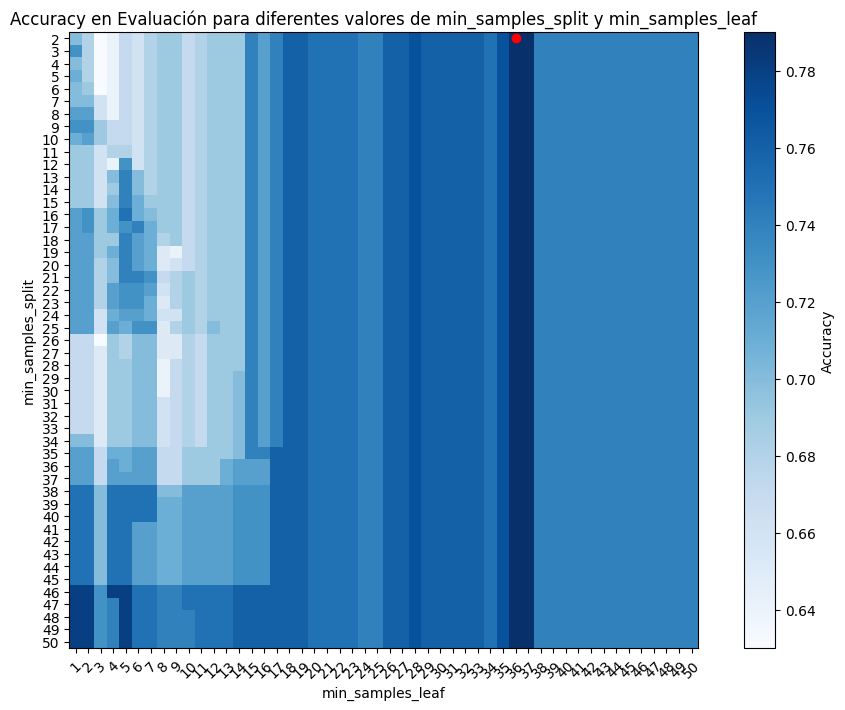

Valor óptimo de min_samples_split: 2
Valor óptimo de min_samples_leaf: 36


In [14]:
Graficar_curva_precision(test_accuracy,min_samples_split_range,min_samples_leaf_range)

In [16]:
# Entrenar un nuevo árbol utilizando ambos valores
# seleccionados y comparar los valores de accuracy obtenidos con los de punto 2.a.

tree_classifier = DecisionTreeClassifier(random_state=0,
                                         min_samples_split=optimal_min_samples_split,
                                          min_samples_leaf=optimal_min_samples_leaf)
tree_classifier.fit(data_train, target_train)

# Predecir las etiquetas en el conjunto de entrenamiento y evaluación
target_train_predict = tree_classifier.predict(data_train)
target_test_predict = tree_classifier.predict(data_test)

# Calcular la precisión (accuracy) en el conjunto de entrenamiento y evaluación
accuracy_train = accuracy_score(target_train, target_train_predict)
accuracy_test = accuracy_score(target_test, target_test_predict)

print("Nueva precisión en el conjunto de entrenamiento:", round(accuracy_train,3))
print("Nueva precisión en el conjunto de evaluación:", round(accuracy_test,3))

Nueva precisión en el conjunto de entrenamiento: 0.759
Nueva precisión en el conjunto de evaluación: 0.79


Ahora los valores obtenidos son:

Nueva precisión en el conjunto de entrenamiento: 0.759

Nueva precisión en el conjunto de evaluación: 0.79

Vemos que estos resultados son mejores, debido a que el arbol de decisión generaliza mas los datos y se obtienen precisiones similares en ambos conjuntos. Hemos eliminado el sobreentrenamiento anterior.

#  2c) Podar árbol
Sobre el modelo entrenado en el punto 2.a, realizar poda por niveles desde 1 hasta 15 y
graficar cómo varía el valor de accuracy sobre el conjunto de entrenamiento y evaluación
para cada nivel de poda. ¿Cuál considera que es el nivel de poda óptimo y por qué?

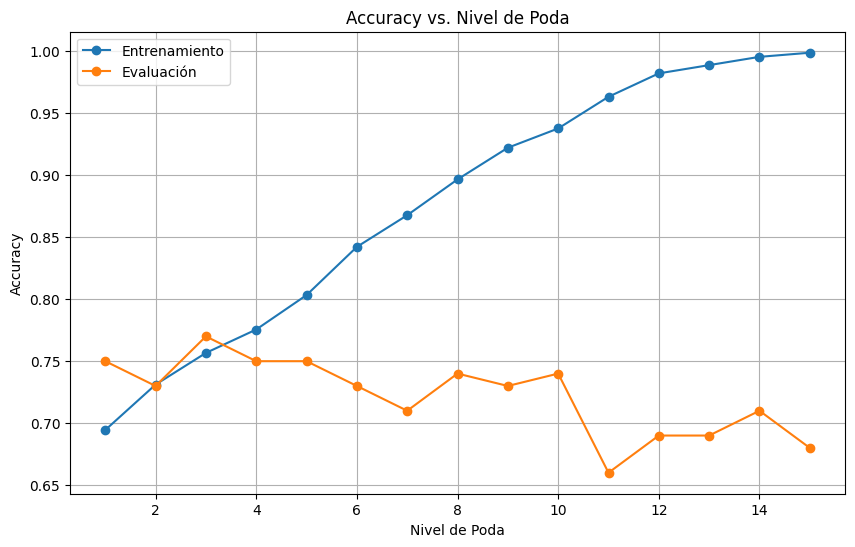

In [18]:
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# Se define el rango para los niveles de poda (1 a 15)
rango = range(1,16)

# Listas para almacenar las precisiones en entrenamiento y evaluación
train_accuracy = []
eval_accuracy = []

# Iterar sobre los niveles de poda desde 1 hasta 15
for max_depth in rango:
    # Crear y entrenar un árbol de decisión con el nivel de poda actual
    tree_classifier = DecisionTreeClassifier(random_state=0, max_depth=max_depth)
    tree_classifier.fit(data_train, target_train)

    # Predecir las etiquetas en el conjunto de entrenamiento y evaluación
    target_train_predict = tree_classifier.predict(data_train)
    target_eval_predict = tree_classifier.predict(data_test)

    # Calcular la precisión en entrenamiento y evaluación
    accuracy_train = accuracy_score(target_train, target_train_predict)
    accuracy_eval = accuracy_score(target_test, target_eval_predict)

    # Almacenar las precisiones en las listas
    train_accuracy.append(accuracy_train)
    eval_accuracy.append(accuracy_eval)

# Graficar cómo varía el valor de accuracy con respecto al nivel de poda
plt.figure(figsize=(10, 6))
plt.plot(rango, train_accuracy, marker='o', label='Entrenamiento')
plt.plot(rango, eval_accuracy, marker='o', label='Evaluación')
plt.xlabel('Nivel de Poda')
plt.ylabel('Accuracy')
plt.title('Accuracy vs. Nivel de Poda')
plt.legend()
plt.grid(True)
plt.show()


In [19]:
max_eval_accuracy = max(eval_accuracy)
indice_max_eval_accuracy = eval_accuracy.index(max_eval_accuracy)
train_accuracy_at_max_eval_accuracy = round(train_accuracy[indice_max_eval_accuracy+1],3)
print(f"Accuracy óptimo en el conjunto de testeo: {max_eval_accuracy}")
print(f"Accuracy del conjunto de entrenamiento para dicha profundidad: {train_accuracy_at_max_eval_accuracy}")

Accuracy óptimo en el conjunto de testeo: 0.77
Accuracy del conjunto de entrenamiento para dicha profundidad: 0.776


max_depth es la máxima profundidad del arbol. Por defecto este valor es "None", por lo tanto el arbol se va a expandir todo lo que se crea necesario.

Vemos que si le damos un max_depth elevado, el accuracy del conjunto de entrenamiento tiene una gran discrepancia en comparación con el accuracy del conjunto de testeo. Esto indica que el arbol se está sobreentrenando.

El valor óptimo para el max_depth en este caso es igual a 3. Donde el conjunto de evaluación llega a su valor máximo y no tiene gran diferencia con el valor del accuracy para el conjunto de entrenamiento.




---

